# Building an Intrusion Detection System using Machine Learning

**Client**: online company looking for a data science consultant to assist them with their web security problems.

**Goal**: The goal is the help built a system for intrusion detection, to detect when someone has intruded in the network and identify the attack.

Cyber-attacks against individuals and businesses are getting more and more prevelant as computers, mobile devices, and networks have become more integral in everyday life. The downside of this is the growing nature of attacks by network intruders and cyber criminals with malicious intent. 

Powerful defence mechanisms involving intrusion detection systems are essential for detecing such attacks. It is the goal for machines to learn from these behaviors and detect these suspicious attacks. There is an enormous benefit in machine learning and deep learning being applied in the cybersecurity domain.  

## Data Wrangling 

### The Dataset

For this project we are going to utilize the UNSW-NB 15 dataset created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviors. Found here: https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/

This dataset bridges this gap and covers a variety of modern attacks.

In [1]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


In [2]:
#import datasets
train_set = pd.read_csv('UNSW_NB15_training-set.csv')


In [3]:
test_set = pd.read_csv('UNSW_NB15_testing-set.csv')

In [5]:
train_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train_set = train_set.drop(['id'], axis=1)
test_set = test_set.drop(['id'],axis=1)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin                 175341 non-null int64
stcpb     

**The training set has 175,341 records.**

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-null int64
stcpb                82332 non-n

**The testing set has 82,332 records**

**Dataset splitting for learning techniques**
- splitting a dataset into training and testing sets is essential for the training and validation of its algorithms. A training set is a set of instances for determining the learning classifier's parameters, a validation set is a set of instances used to adjust those parameters as much as possible and a testing set is a set of observations for evaluating the classifiers performance. 
- The UNSW-NB15 dataset is divided into a roughly 60:40 ratio. 

## Exploratory Data Analysis 

In [5]:
#count feature data types
train_set.dtypes.value_counts()

int64      29
float64    11
object      4
dtype: int64

### Descriptive statistics

In [10]:
train_set.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


### Attacks vs Normal 

Text(0.5, 1.0, 'Samples Identified by Attack ')

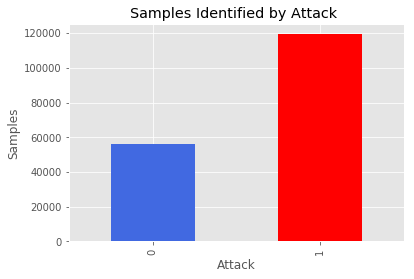

In [11]:
train_set.groupby('label').size().plot(kind='bar',color=['royalblue','r'])
plt.xlabel('Attack')
plt.ylabel('Samples')
plt.title('Samples Identified by Attack ')


In [6]:
train_set[train_set['label'] == 0].shape

(56000, 44)

In [7]:
train_set[train_set['label'] == 1].shape

(119341, 44)

In [8]:
print('Normal connections equals to {} of the data'.format(round(56000/175341,2)))
print('Malicious connections equal to {} of the data'.format(round(119341/175341,2)))


Normal connections equals to 0.32 of the data
Malicious connections equal to 0.68 of the data


Text(0.5, 1.0, 'Samples Identified by Attack ')

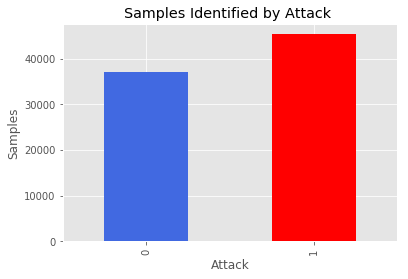

In [12]:
test_set.groupby('label').size().plot(kind='bar',color=['royalblue','r'])
plt.xlabel('Attack')
plt.ylabel('Samples')
plt.title('Samples Identified by Attack ')


In [9]:
test_set[test_set['label'] == 0].shape

(37000, 44)

In [10]:
test_set[test_set['label'] == 1].shape

(45332, 44)

In [63]:
37000+45332

82332

In [64]:
print('Normal connections equals to {} of the data'.format(round(37000/82332,2)))
print('Malicious connections equal to {} of the data'.format(round(42332/82332,2)))



Normal connections equals to 0.45 of the data
Malicious connections equal to 0.51 of the data


Looking into this distribution further the data set was divided into a 60:40 ration of training and testing sets. To avoid biasing the 
Decision engine approach and reflecting high FARs(False Alarm Rates), these sets to not contain any redundant observations which ensure the credibility of the evaluations. 

In [14]:
train_set.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [15]:
train_set.groupby('attack_cat').size().sort_values(ascending=False)


attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
dtype: int64

**There are 9 sub-classes of attacks**
- Fuzzers
- Analysis
- Backdoor
- DoS
- Explotis
- Generic
- Reconnaissance
- Shellcode
- Worms

Text(0.5, 1.0, 'Samples Identified by subclass')

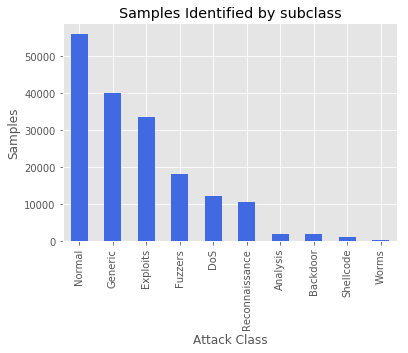

In [16]:
train_set.groupby('attack_cat').size().sort_values(ascending=False).plot(kind='bar',color='royalblue')
plt.xlabel('Attack Class')
plt.ylabel('Samples')
plt.title('Samples Identified by subclass')




These attack categories represent the current cyber scenario. It is observed that the distribution of attacks is highly imbalanced which depicts a real-world situation. 

**The majority of the observations are normal followed by generic, exploits and fuzzers attacks. However, it is important to note the distribution of attacks vs normal. Having 56,000 observations as normal with the remaining 119, 341 observations as some kind of attack.**

#### About the Data

Data Size:
- 49 features
- 175,341 connections in the training dataset
- 82332 connections in the testing dataset

Connection types:
- Training data has 32% normal connections and 68% malicious connections.
- The goal is to classify connections as normal (0) or attacks (1), and not classify them by their sub-class types.

Feature Summary:
- 30 Int
- 11 Float
- 4 Objects

### Protocol EDA

Network protocols are formal standards and policies comprised of rules, procedures and formats that define communication between two or more devices over a network. It governs the end-to-end processes of timely, secure and managed data or network communication.

Let's analyze protocol type and labeled attacks.

Text(0, 0.5, 'Count')

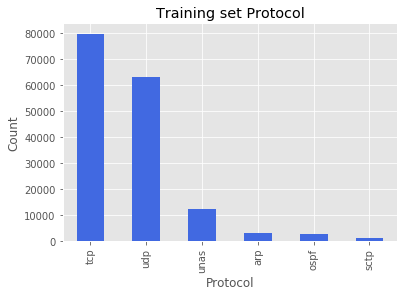

In [17]:
train_set.groupby('proto').size().sort_values(ascending=False).head(6).plot(kind='bar',color='royalblue')
plt.title('Training set Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

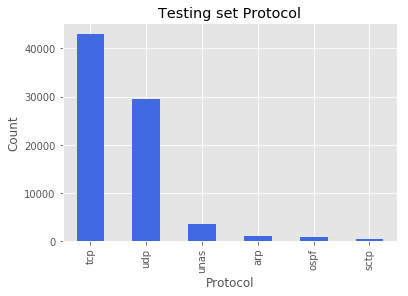

In [18]:
test_set.groupby('proto').size().sort_values(ascending=False).head(6).plot(kind='bar',color='royalblue')
plt.title('Testing set Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')

**Most networks use a tcp or udp protocol.**

In [19]:
train_set.groupby('label').proto.value_counts().unstack(0).sort_values(by=1,ascending=False).head(5)

label,0,1
proto,,
udp,13922.0,49361.0
tcp,39121.0,40825.0
unas,NaN,12084.0
ospf,64.0,2531.0
sctp,NaN,1150.0


In [11]:
print('percentage of attacks on upd:',round(49361/(49361+13922),2))
print('percentage of attacks on tcp:',round(40825/(40825+39121),2))

percentage of attacks on upd: 0.78
percentage of attacks on tcp: 0.51


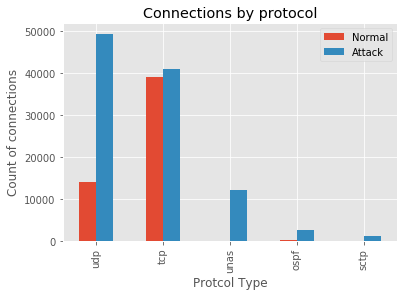

In [21]:

train_set.groupby('label').proto.value_counts().unstack(0).sort_values(by=1,ascending=False).head(5).fillna(0).plot(kind='bar')
plt.title('Connections by protocol')
plt.xlabel('Protcol Type')
plt.ylabel('Count of connections')
plt.legend(['Normal','Attack'])

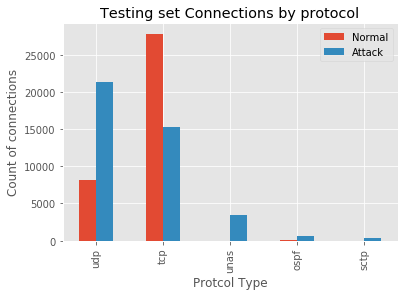

In [66]:

test_set.groupby('label').proto.value_counts().unstack(0).sort_values(by=1,ascending=False).head(5).fillna(0).plot(kind='bar')
plt.title('Testing set Connections by protocol')
plt.xlabel('Protcol Type')
plt.ylabel('Count of connections')
plt.legend(['Normal','Attack'])

**The graph shows the top 5 attacks by protocol types. Having most attacks from udp and tcp.**
- percentage of attacks on udp protocols is around **78%**
- percentage of attacks on tcp protocols is around **51%**

### Feature Correlation

In [14]:
scatter_df_train = train_set.drop(['proto','service','state','attack_cat','label'], axis=1)


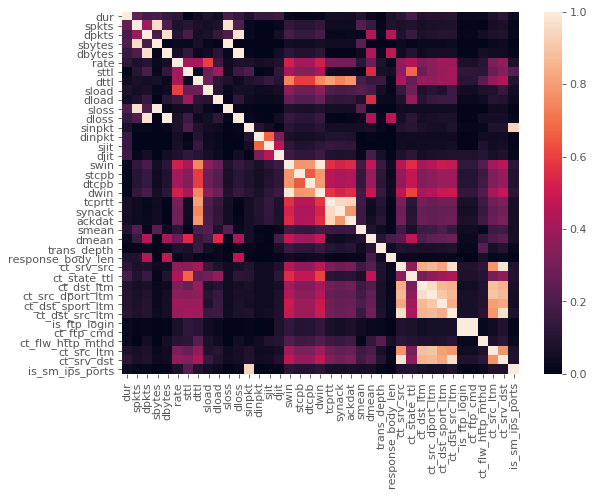

In [15]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#calculate the correlation matrix 
corr = scatter_df_train.corr().abs()


#plot heatmap
sns.heatmap(corr,xticklabels = corr.columns,
           yticklabels=corr.columns)

In [16]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

Pearson's correlation coefficient is used to determine the relationship between two features. It gives the measure of strength of correlation between two variables. 

The dataset consists of various network traffic features. Keeping highly correlated features is not ideal for our model. The correlated featured pairs are 
- sloss and sbytes
- dloss, dbytes
- is_ftp_login, ct_ftp_cmd

We should remove these features to avoid redundancy. We might want to apply some dimensionlity reduction techniques to retain only the relevant features.

In [17]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [18]:
to_drop

['sbytes',
 'dbytes',
 'sloss',
 'dloss',
 'dwin',
 'ct_src_dport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_srv_dst']

In [19]:
train_set2= train_set.drop(to_drop,axis=1)

In [20]:
test_set2 = test_set.drop(to_drop,axis=1)

In [21]:
print(train_set2.shape)
print(test_set2.shape)

(175341, 35)
(82332, 35)


### Pairplot 

In [31]:
train_set_col1 =  train_set2.iloc[:,:6]
train_set_col2 = train_set2.iloc[:,6:12]
train_set_col3 = train_set2.iloc[:,12:18]
train_set_col4 = train_set2.iloc[:,18:24]
train_set_col5 = train_set2.iloc[:,24:30]
train_set_col6 = train_set2.iloc[:,30:-2]


In [32]:
label_col = train_set2.iloc[:,-1]

In [33]:
dat1 = pd.concat([train_set_col1,label_col],axis=1)
dat2 = pd.concat([train_set_col2, label_col],axis=1)
dat3 = pd.concat([train_set_col3, label_col],axis=1)
dat4 = pd.concat([train_set_col4, label_col],axis=1)
dat5 = pd.concat([train_set_col5, label_col],axis=1)
dat6 = pd.concat([train_set_col6, label_col],axis=1)


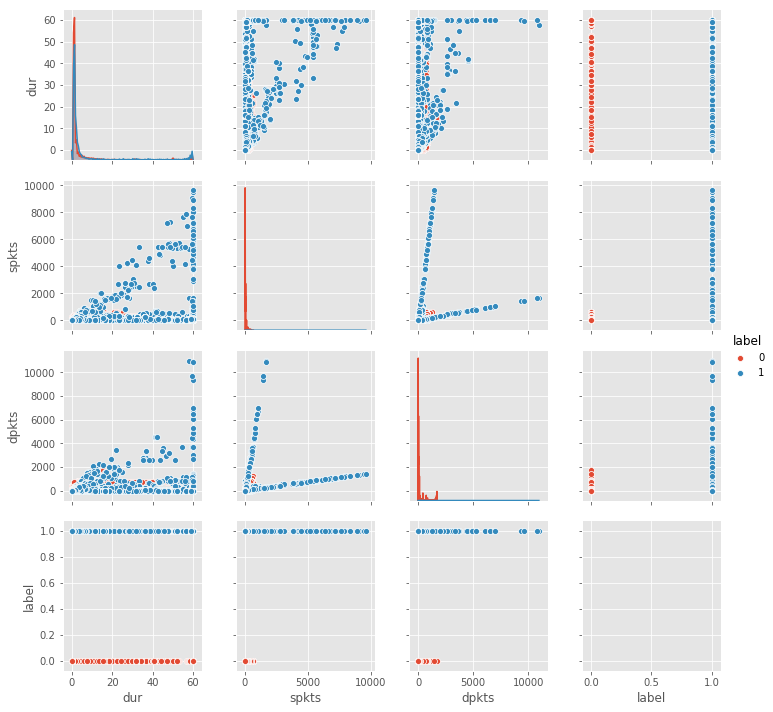

In [125]:

a = sns.pairplot(dat1, hue='label')

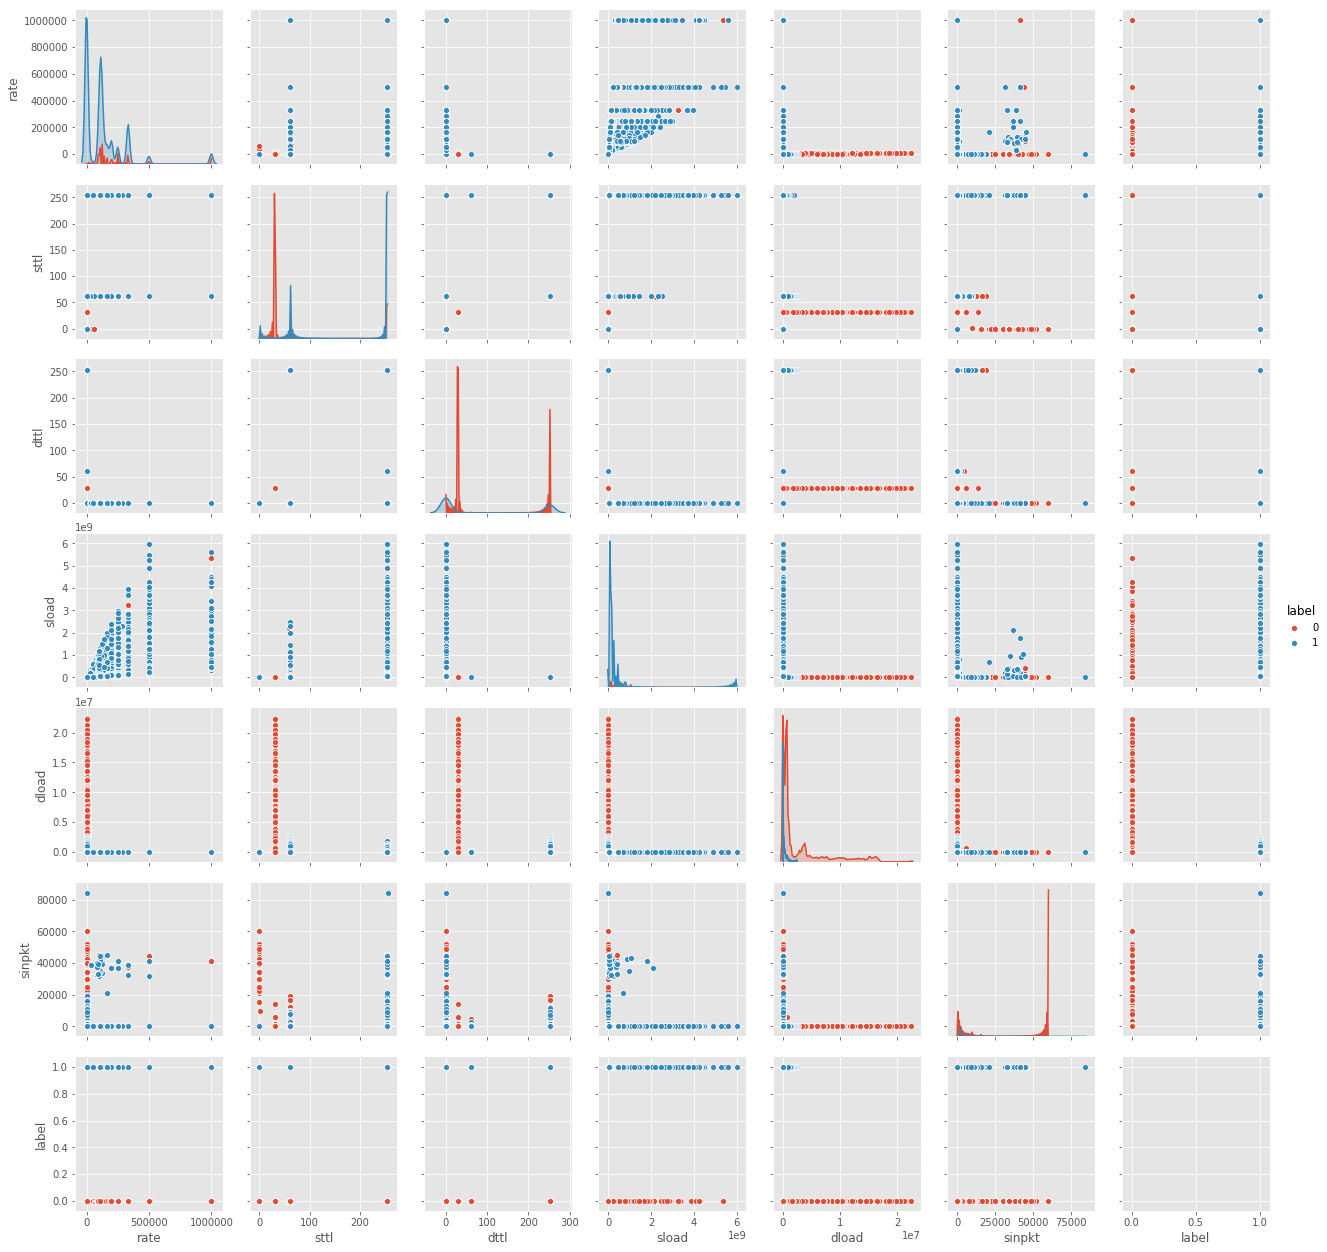

In [120]:
b = sns.pairplot(dat2, hue='label')

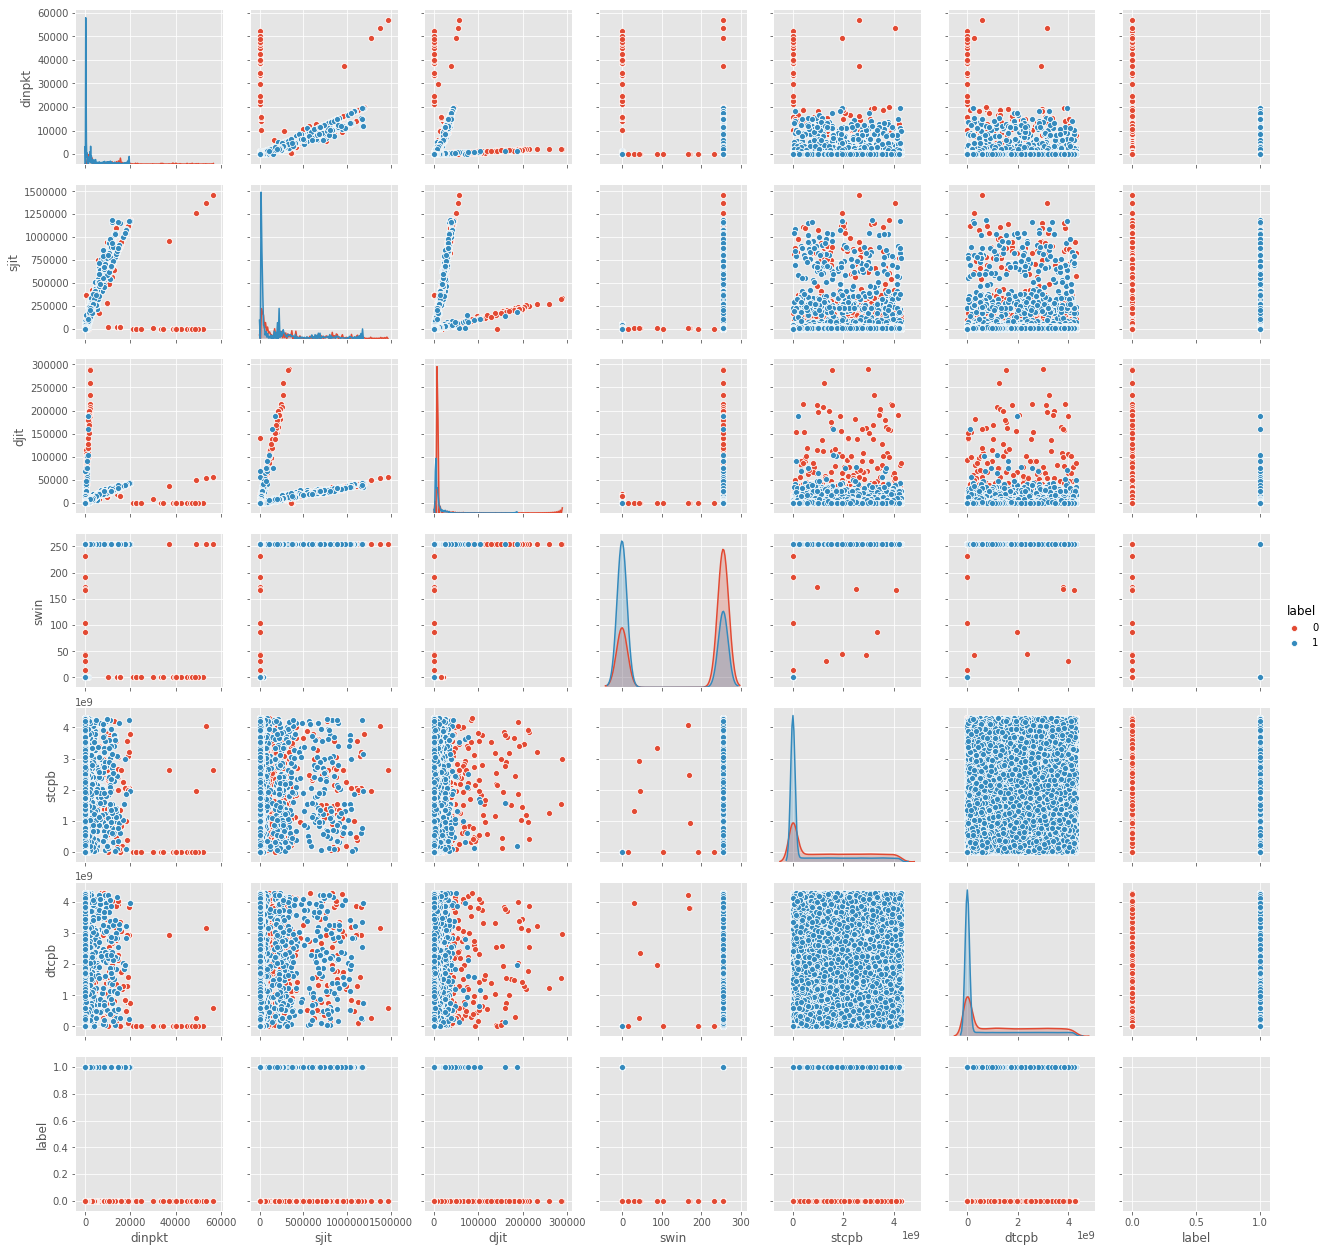

In [121]:
c = sns.pairplot(dat3, hue='label')

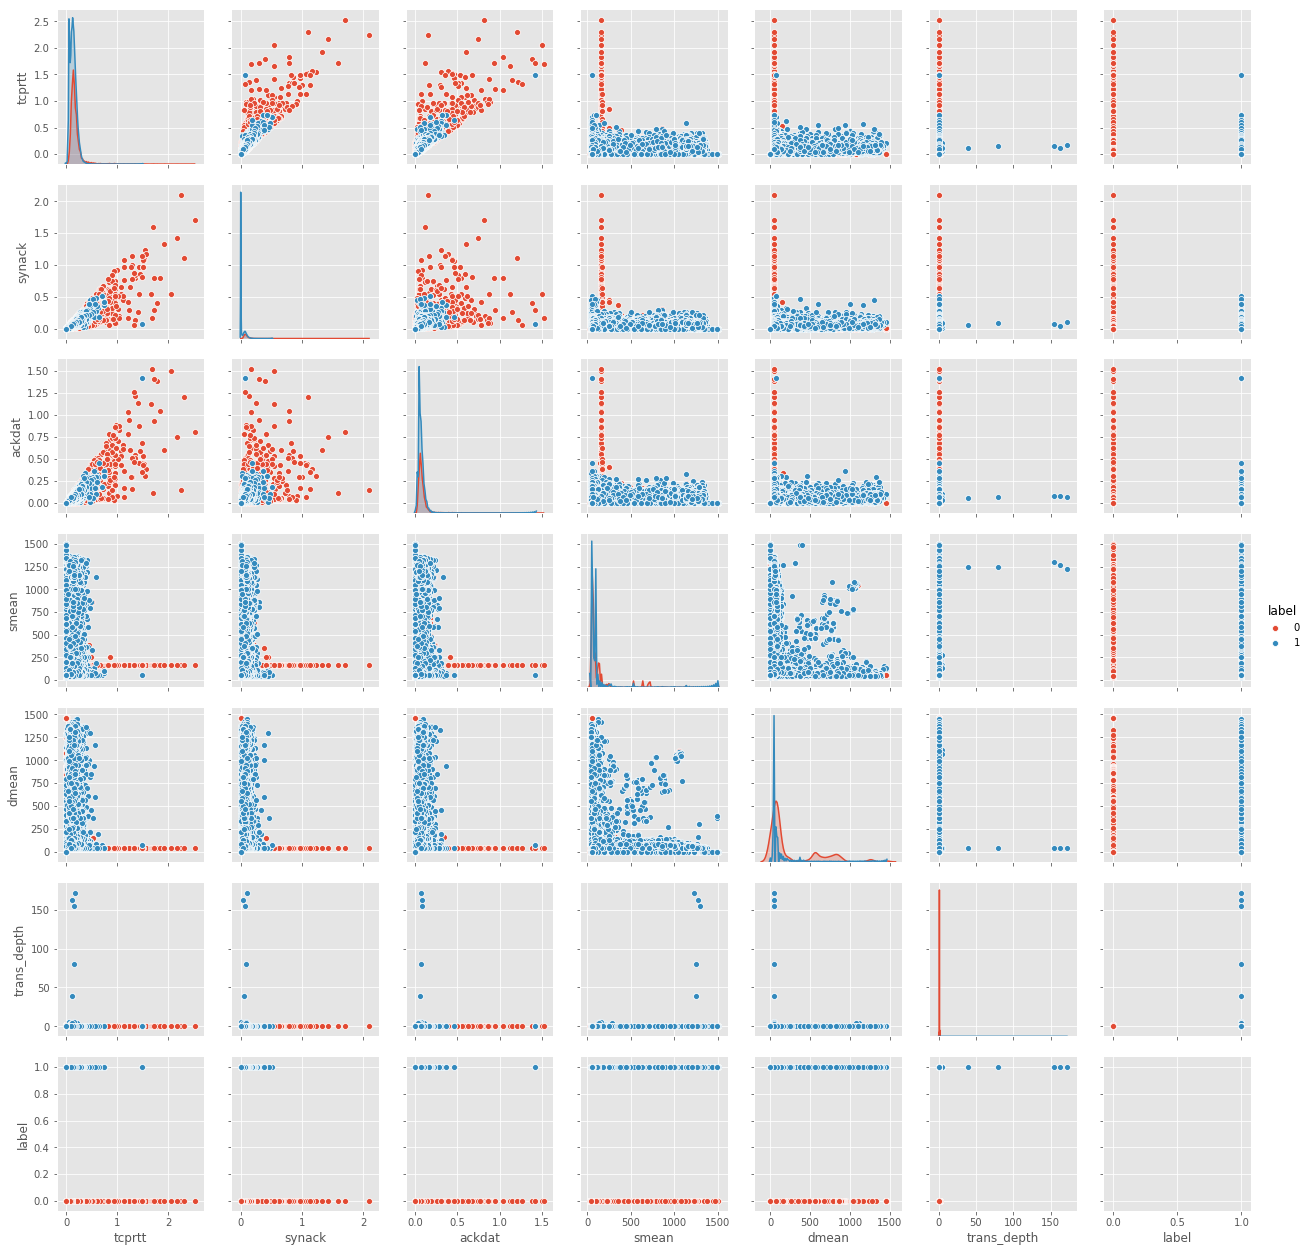

In [122]:
d = sns.pairplot(dat4, hue='label')

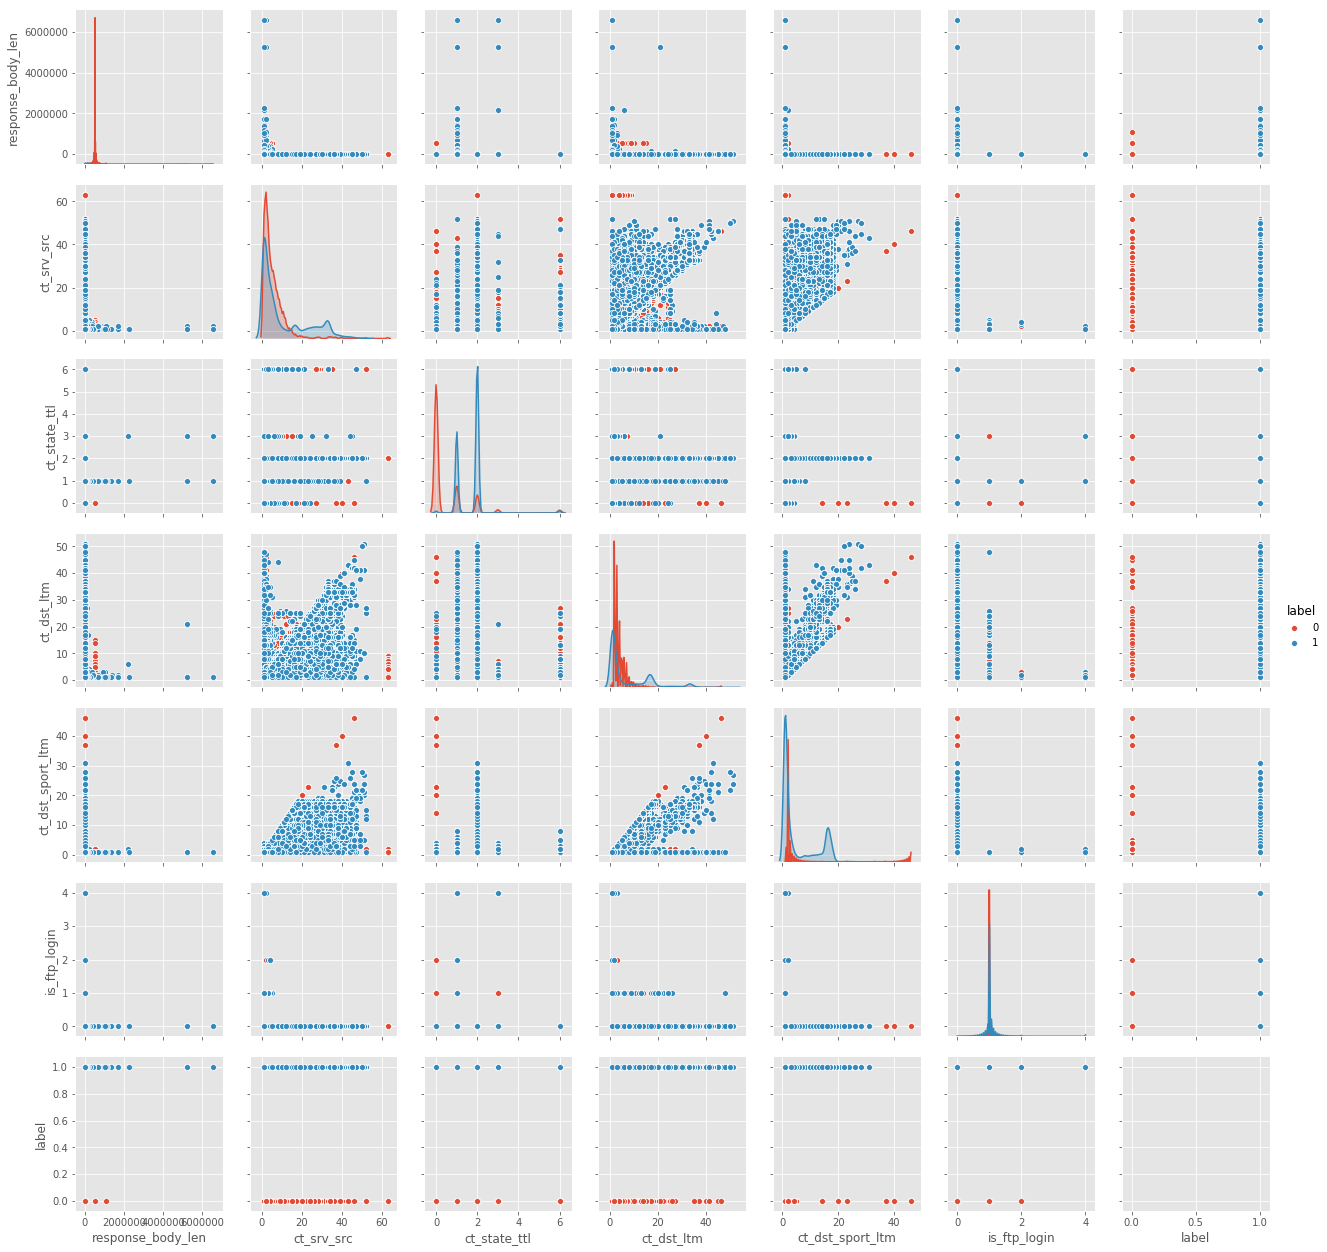

In [123]:
e = sns.pairplot(dat5, hue='label')

f = sns.pairplot(dat6, hue='label')

A pairs plot allows us to see both distribution of single variables and relationships between variables. Pair plots are a great method to identify trends for followup analysis. 

#### Pearson Correlation 

From these pairplots, I notice some positive correlations with certain variables. 

- synack and ackdat

Synack is the TCP connection setup time between the SYN and SYN_ACK packets and Ackdat is the TCP connection setup time, between SYN_ACK and the ACK packets.

A packet is the unito f data that is routed between an origin and a destination on the internet or any other packet-switched network. Network packets are small amounts of data passed over networks. Each pakcet sent includes information such as the source and destination, the protocls or identification number. 

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(1.5, 1.6, 'r = 0.788, p = 0.0')

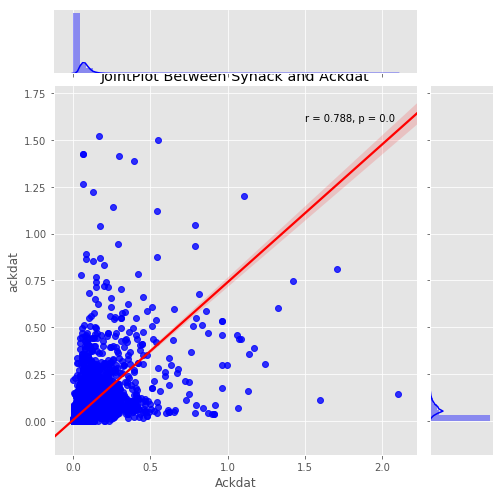

In [78]:
sns.jointplot('synack', 'ackdat', data = train_set2, kind='reg',size = 7,
              color='b',
             joint_kws = {'line_kws':{'color':'red'}},
             )
plt.title('JointPlot Between Synack and Ackdat')
plt.xlabel('Synack')
plt.xlabel('Ackdat')
plt.text(1.5,1.6,'r = 0.788, p = 0.0')

In [73]:
import pylab
from scipy import stats
stats.pearsonr(train_set2['synack'],train_set2['ackdat'])


(0.7886230642443961, 0.0)

In [74]:
print('Pearson r coefficient is:', 0.7886)
print('P-value is:' , 0.0)

Pearson r coefficient is: 0.7886
P-value is: 0.0


The correlation coefficient between the two connection time is positively correlated with a score of 0.788. The p-value is close to 0, which indicates this relationship is statistically significant. 

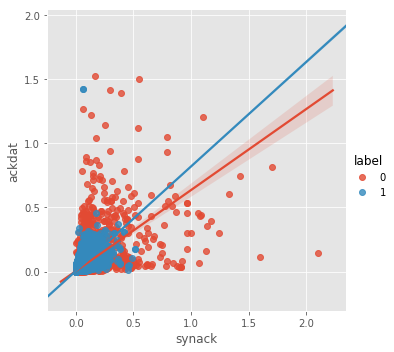

In [81]:
sns.lmplot(x='synack',y='ackdat',hue='label', data=train_set2)

We can see some clear clustering between the two variables and our labels. This might indicate the two connection times will have a good impact on classification for our predictive model. 

## Predictive Modeling

In [22]:
import sklearn.model_selection 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### Preprocessing

In [23]:
#create dummies for categorical variables
train_df = pd.get_dummies(train_set2, columns=['proto','service','state'],drop_first=True)



In [24]:
test_df =pd.get_dummies(test_set2, columns=['proto','service','state'],drop_first=True)



In [25]:
print(train_df.shape)
print(test_df.shape)

(175341, 184)
(82332, 180)


In [26]:
#check missing columns from test dataframe ,drop from train
missing_cols1 = set(train_df.columns) - set(test_df.columns)

In [27]:
#check missing columns from train dataframe, drop from test
missing_cols2 = set(test_df.columns) - set(train_df.columns)

In [28]:
missing_col1 = list(missing_cols1)

In [29]:
missing_col1

['state_no', 'state_URN', 'proto_icmp', 'state_PAR', 'proto_rtp', 'state_ECO']

In [30]:
missing_cols2 = list(missing_cols2)

In [31]:
train_df= train_df.drop(missing_cols1,axis=1)

In [32]:
test_df = test_df.drop(missing_cols2,axis=1)

In [33]:
print(train_df.shape)
print(test_df.shape)

(175341, 178)
(82332, 178)


In [34]:
#drop the attack_cat as it is a subclass of our label
#split train_set to X_train and y_train
X_train = train_df.drop(['attack_cat','label'], axis=1)
y_train = train_df['label']

In [35]:
X_test = test_df.drop(['attack_cat','label'],axis = 1)
y_test = test_df['label']

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175341, 176)
(175341,)
(82332, 176)
(82332,)


In [37]:
#standardize features

sc = StandardScaler()

#fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

#apply the scaled to the test data
X_test_std = sc.transform(X_test)

### Baseline- Logistic Regression

Classification tries to predict, which of a small set of classes, an observation belongs to. Our goal is to find y, a label based on knowning a feature vector x. For this problem our goal is to predict the label (normal or attack) this is our y variable. 

In [232]:
log_reg = LogisticRegression()

#fit the model on the training data
log_reg.fit(X_train_std,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
print('Logistic Regression accuracy training set:',accuracy_score(log_reg.predict(X_train_std),y_train))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_std), y_test))


Logistic Regression accuracy training set: 0.9338660096611745
Logistic Regression accuracy testing set: 0.8081183500947384


The model seems to have trained too well on the training data with accuracy of 93%, and with an accuracy of 80% on testing data. This indicates overfitting. In order to create an optimal model we would need to use regularization techniques.



#### Confusion Matrix Logistic Regression

In [235]:
ypred_log_test = log_reg.predict(X_test_std)

In [236]:
ypred_log_train = log_reg.predict(X_train_std)

In [237]:
cm_log_train = confusion_matrix(y_train,ypred_log_train,labels = [0,1])
print(cm_log_train)

[[ 45743  10257]
 [  1339 118002]]


In [238]:
cm_log_test = confusion_matrix(y_test,ypred_log_test,labels=[0,1])
print(cm_log_test)

[[22463 14537]
 [ 1261 44071]]


#### Classification Report Logistic Regression

In [241]:
from sklearn.metrics import classification_report


In [242]:
log_class_train = classification_report(y_train,ypred_log_train)

print(log_class_train)

             precision    recall  f1-score   support

          0       0.97      0.82      0.89     56000
          1       0.92      0.99      0.95    119341

avg / total       0.94      0.93      0.93    175341



In [243]:
log_class_test = classification_report(y_test,ypred_log_test)
print(log_class_test)

             precision    recall  f1-score   support

          0       0.95      0.61      0.74     37000
          1       0.75      0.97      0.85     45332

avg / total       0.84      0.81      0.80     82332



**Precision**- What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
- Accuracy of positiv predictions (TP/(TP+FP)

**Recall**- What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
- Fraction of positives that were correctly identified (TP/(TP+FN)

**F1 Score**- What percent of positive predictions were correct?

The F1 Score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. 

From the classification report we get a precision score of 95% for normal prediction and 75% score for attack prediction. However, we also get a recall score of 61% for normal predictions and 97% for attack predictiosn. This indicates an imbalance in our dataset. 

#### Regularization

In order to create less complex model when you have a large number of featurss in your dataset, some of the regularization techniques used to address overfitting and feature selection are:
- L1 Regularization
- L2 Regularization

A regression model that uses L1 regularization is called **Lasso Regression** and model which uses L2 is called **Ridge Regression**

**Tuning the model**

The model has some hyperparameters we can tune. For this model we will use a mix of cross-validation and grid search. In Logistic Regression, the most important parameter to tune is the regularization parameter, C.

The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse.

In [256]:
penalty = ['l1','l2']

Cs = [0.001, 0.1, 1, 10, 100]

hyperparameters = dict(C=Cs, penalty=penalty)

In [257]:
gs_log = RandomizedSearchCV(log_reg, hyperparameters,random_state=2,cv=3,verbose=0,n_jobs=-1)




In [ ]:
best_model_log_reg = gs_log.fit(X_train_std,y_train)

In [75]:
print('Best C:', best_model_log_reg.best_estimator_.get_params()['C'])

Best C: 0.001


#### Best Logistic Regression Model


In [254]:
ypredbplr = best_model_log_reg.predict(X_test_std)

NameError: name 'best_model_log_reg' is not defined

In [78]:
best_log_reg = LogisticRegression(penalty='l2',C=0.001)



In [79]:
best_log_reg.fit(X_train_std,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
print('Logistic Regression accuracy training set:',accuracy_score(best_log_reg.predict(X_train_std),y_train))
print('Logistic Regression accuracy testing set:',accuracy_score(best_log_reg.predict(X_test_std), y_test))


Logistic Regression accuracy training set: 0.928499324174038
Logistic Regression accuracy testing set: 0.7921342855754749


#### Best Log Confusion Matrix

In [ ]:
cm_log1 = confusion_matrix(y_train,ypredblr,labels=[0,1])
print(cm_log1)

In [82]:
pd.crosstab(y_test,ypredbplr, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,21215,15785,37000
1,1329,44003,45332
All,22544,59788,82332


#### Best Log Classification Report

In [253]:
print(classification_report(y_train,best_log_reg.predict(X_train_std)))

NameError: name 'best_log_reg' is not defined

In [83]:
print(classification_report(y_test,ypredbplr))

             precision    recall  f1-score   support

          0       0.94      0.57      0.71     37000
          1       0.74      0.97      0.84     45332

avg / total       0.83      0.79      0.78     82332



In [103]:
#computed accuracy by the sum of the diagonal
#divided by the sum of all matrix entries
(cm_log2[0,0]+cm_log2[1,1])/np.sum(cm_log2)


0.7921342855754749

#### Logistic Regression ROC curve


This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It generated by plotting the True Positive rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. 


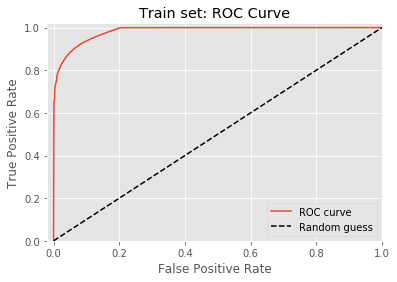

In [109]:
from sklearn.metrics import roc_curve

y_pred_prob_train = log_reg.predict_proba(X_train_std)[:,1]

fpr, tpr, thresholds = roc_curve(y_train,y_pred_prob_train)

#create plot
plt.plot(fpr,tpr, label = 'ROC curve')
plt.plot([0,1],[0,1],'k--',label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Train set: ROC Curve')
_ = plt.xlim([-0.02,1])
_ = plt.ylim([0,1.02])
_ = plt.legend(loc = 'lower right')


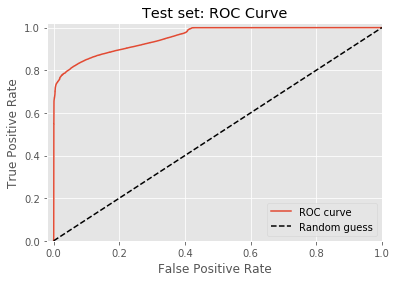

In [110]:

y_pred_prob = log_reg.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

#create plot
plt.plot(fpr,tpr, label = 'ROC curve')
plt.plot([0,1],[0,1],'k--',label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Test set: ROC Curve')
_ = plt.xlim([-0.02,1])
_ = plt.ylim([0,1.02])
_ = plt.legend(loc = 'lower right')



In [111]:
print('Training set ROC score:', roc_auc_score(y_train,y_pred_prob_train))

Training set ROC score: 0.9830028601265043


In [112]:
from sklearn.metrics import roc_auc_score
print('Testing set ROC score:' ,roc_auc_score(y_test,y_pred_prob))

Testing set ROC score: 0.9532614932831888


#### Handling Imbalance Classification Problems

##### Train a logistic regression with weighted classes

In [114]:
log_reg_bal = LogisticRegression(random_state=0, class_weight='balanced')



In [259]:
log_reg_bal.fit(X_train_std,y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [298]:
print('Logistic Regression accuracy training set:',accuracy_score(log_reg_bal.predict(X_train_std),y_train))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg_bal.predict(X_test_std), y_test))


Logistic Regression accuracy training set: 0.9274556435745205
Logistic Regression accuracy testing set: 0.8306490793373172


In [121]:
ypred_log_reg_bal_train = log_reg_bal.predict(X_train_std)

In [122]:
ypred_log_reg_bal = log_reg_bal.predict(X_test_std)

In [125]:
cm_log_reg_bal_train = confusion_matrix(y_train,ypred_log_reg_bal_train,labels=[0,1])
print(cm_log_reg_bal_train)

[[ 49476   6524]
 [  6196 113145]]


In [126]:
cm_log_reg_bal = confusion_matrix(y_test,ypred_log_reg_bal,labels=[0,1])
print(cm_log_reg_bal)

[[26439 10561]
 [ 3382 41950]]


In [127]:

pd.crosstab(y_train,ypred_log_reg_bal_train, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,49476,6524,56000
1,6196,113145,119341
All,55672,119669,175341


In [69]:
pd.crosstab(y_test,ypred_log_reg_bal, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,26439,10561,37000
1,3382,41950,45332
All,29821,52511,82332


In [128]:

(cm_log_reg_bal_train[0,0]+cm_log_reg_bal_train[1,1])/np.sum(cm_log_reg_bal_train)


0.9274556435745205

In [70]:
(cm_log_reg_bal[0,0]+cm_log_reg_bal[1,1])/np.sum(cm_log_reg_bal)


0.8306490793373172

In [129]:
print(classification_report(y_train,ypred_log_reg_bal_train))

             precision    recall  f1-score   support

          0       0.89      0.88      0.89     56000
          1       0.95      0.95      0.95    119341

avg / total       0.93      0.93      0.93    175341



In [71]:

print(classification_report(y_test,ypred_log_reg_bal))

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



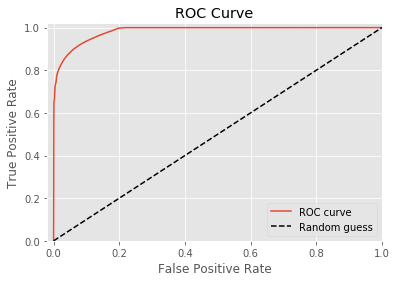

In [130]:
y_pred_prob_lrb_train = log_reg_bal.predict_proba(X_train_std)[:,1]

fpr, tpr, thresholds = roc_curve(y_train,y_pred_prob_lrb_train)

#create plot
plt.plot(fpr,tpr, label = 'ROC curve')
plt.plot([0,1],[0,1],'k--',label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02,1])
_ = plt.ylim([0,1.02])
_ = plt.legend(loc = 'lower right')


In [132]:
print('training set ROC score:', roc_auc_score(y_train,y_pred_prob_lrb_train))

training set ROC score: 0.9831008442045424


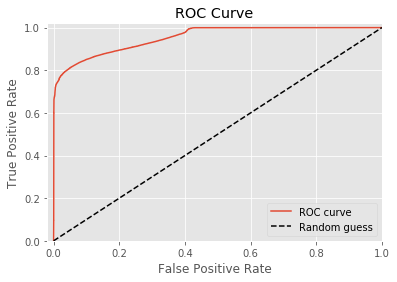

In [133]:
y_pred_prob_lrb = log_reg_bal.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_lrb)

#create plot
plt.plot(fpr,tpr, label = 'ROC curve')
plt.plot([0,1],[0,1],'k--',label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02,1])
_ = plt.ylim([0,1.02])
_ = plt.legend(loc = 'lower right')


In [134]:
print(roc_auc_score(y_test,y_pred_prob_lrb))

0.9533850000953923


##### Up-sample Minority Class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, the most common way is to simply resample with replacement.
- First, we'll separate observations from each class into different dataframes. 
- Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
- Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [244]:
from sklearn.utils import resample

In [245]:
#seperate majority and minority classes
df_majority = train_df[train_df.label==1]
df_minority = train_df[train_df.label==0]

In [246]:
df_majority.shape

(119341, 178)

In [247]:
df_minority.shape

(56000, 178)

In [248]:
#upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace=True, #sample with replacement
                                n_samples=119341, #to match majority class
                                random_state=42)

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [249]:
#display new class counts
df_upsampled.label.value_counts()

1    119341
0    119341
Name: label, dtype: int64

In [250]:
X_train_upsampled = df_upsampled.drop(['attack_cat','label'], axis=1)
y_train_upsampled = df_upsampled['label']

In [251]:
print(X_train_upsampled.shape)
print(y_train_upsampled.shape)

(238682, 176)
(238682,)


In [252]:

#fit the scaler to the training data and transform
X_train_upsampled_std = sc.fit_transform(X_train_upsampled)

#apply the scaled to the test data
X_test_upsampled_std = sc.transform(X_test)

In [253]:
#train model
log_reg.fit(X_train_upsampled_std,y_train_upsampled)


#predict on training set
pred_log_reg_up = log_reg.predict(X_train_upsampled_std)

In [254]:
print('Logistic Regression accuracy training set:',accuracy_score(pred_log_reg_up,y_train_upsampled))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_upsampled_std), y_test))


Logistic Regression accuracy training set: 0.9154607385559028
Logistic Regression accuracy testing set: 0.8298110090851674


In [255]:
pred_up_train = log_reg.predict(X_train_upsampled)

In [256]:
pred_up_test = log_reg.predict(X_test_upsampled_std)

In [257]:
cm_log_up = confusion_matrix(y_test,pred_up_test,labels=[0,1])
print(cm_log_up)

[[26307 10693]
 [ 3319 42013]]


In [258]:
pd.crosstab(y_test,pred_up_test, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,26307,10693,37000
1,3319,42013,45332
All,29626,52706,82332


In [259]:
print(classification_report(y_train_upsampled,pred_log_reg_up))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91    119341
          1       0.89      0.95      0.92    119341

avg / total       0.92      0.92      0.92    238682



In [95]:
print(classification_report(y_test,pred_up_test))

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



##### Down-sampe Majority class

Down-sampling involves randomly removing observations from the majority class to prevent from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. 
- first, we'll seperate observations from each class into different dataframes.
- next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
- Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame. 



In [260]:
df_minority.shape

(56000, 178)

In [261]:
#downsample majority class
df_majority_downsampled = resample(df_majority, 
                                  replace=False, # sample without replacement
                                  n_samples = 56000,
                                  random_state = 42)



In [262]:
#combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [263]:
#display new class counts
df_downsampled.label.value_counts()

1    56000
0    56000
Name: label, dtype: int64

In [264]:
X_train_downsampled = df_downsampled.drop(['attack_cat','label'], axis=1)
y_train_downsampled = df_downsampled['label']

In [265]:
print(X_train_downsampled.shape)
print(y_train_downsampled.shape)

(112000, 176)
(112000,)


In [266]:

#fit the scaler to the training data and transform
X_train_downsampled_std = sc.fit_transform(X_train_downsampled)

#apply the scaled to the test data
X_test_downsampled_std = sc.transform(X_test)

In [267]:
#train model
log_reg.fit(X_train_downsampled_std,y_train_downsampled)


#predict on training set
pred_log_reg_down = log_reg.predict(X_train_downsampled_std)

In [268]:
print('Logistic Regression accuracy training set:',accuracy_score(pred_log_reg_down,y_train_downsampled))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_downsampled_std), y_test))
      
      

Logistic Regression accuracy training set: 0.9156071428571428
Logistic Regression accuracy testing set: 0.8303089928581839


In [269]:
print(classification_report(y_train_downsampled,pred_log_reg_down))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91     56000
          1       0.89      0.95      0.92     56000

avg / total       0.92      0.92      0.92    112000



In [106]:
print(classification_report(y_test,log_reg.predict(X_test_downsampled_std)))

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



### Baseline model results

In [233]:
print('Logistic Regression accuracy training set:',accuracy_score(log_reg.predict(X_train_std),y_train))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_std), y_test))

Logistic Regression accuracy training set: 0.9338660096611745
Logistic Regression accuracy testing set: 0.8081183500947384


In [278]:
print(log_class_train)
print(log_class_test)

             precision    recall  f1-score   support

          0       0.97      0.82      0.89     56000
          1       0.92      0.99      0.95    119341

avg / total       0.94      0.93      0.93    175341

             precision    recall  f1-score   support

          0       0.95      0.61      0.74     37000
          1       0.75      0.97      0.85     45332

avg / total       0.84      0.81      0.80     82332



For the baseline model I used Logistic Regression. The results showcase an accuracy score of 93% for the training set and 81% for the testing set. In order to determine whether this model overfitted I also create a classification report for the two data sets. 

From our classification report we can see the difference between precision and recall on both attacks and normal classified data. Our test set indicates a precision of **95%** for classifying normal data, the percentage of results which are relevant, and a recall of **61%** which is the percentage of total relevant results correctly classified. Compared to our attack precision which is **75%** and recall of **97%**.

In most problems, you could either give a higher priority to maximizing precision, or recall, depending on the problem you are trying to solve. In this case, it is detecting intrusion in a network. For detecting instrusion are main concern comes from correctly identifying attacks rather than classifying normal networks therefore we should pay more attention to the precision and recall percentages of attack labels. 

Another metric which takes into account both precision and recall is the F1-score. This is the harmonic mean of precision and recall. For our baseline model our f1-score of normal label is **74%** and attack label is **85%**.

##### Tuning model for better accuracy results

My next goal was to see if I can raise the accuracy levels and precision/recall percentages of my model. I used two techniques to compute a higher score. 

The first technique was to tune my model's hyperparameters. Using Randomized search method, the best parameters computed was a L2 regression, also known as ridge, and a C value of 0.001. The results did not change, if anything the model accuracy decreased. 

The second technique was to handle the imbalance data. Using three different imablance data techniques, I was able to marginally increase the percentages of my model for a better predicitive result.


##### Weighted 



In [299]:
print('Logistic Regression accuracy training set:',accuracy_score(log_reg_bal.predict(X_train_std),y_train))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg_bal.predict(X_test_std), y_test))


Logistic Regression accuracy training set: 0.9274556435745205
Logistic Regression accuracy testing set: 0.8306490793373172


In [300]:
print(classification_report(y_train,ypred_log_reg_bal_train))
print(classification_report(y_test,ypred_log_reg_bal))

             precision    recall  f1-score   support

          0       0.89      0.88      0.89     56000
          1       0.95      0.95      0.95    119341

avg / total       0.93      0.93      0.93    175341

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



###### upsample

In [296]:
print('Logistic Regression accuracy training set:',accuracy_score(pred_log_reg_up,y_train_upsampled))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_upsampled_std), y_test))


Logistic Regression accuracy training set: 0.9154607385559028
Logistic Regression accuracy testing set: 0.8261064956517514


In [297]:
print(classification_report(y_train_upsampled,pred_log_reg_up))
print(classification_report(y_test,pred_up_test))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91    119341
          1       0.89      0.95      0.92    119341

avg / total       0.92      0.92      0.92    238682

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



##### Downsample

In [133]:
print('Logistic Regression accuracy training set:',accuracy_score(pred_log_reg_down,y_train_downsampled))
print('Logistic Regression accuracy testing set:',accuracy_score(log_reg.predict(X_test_downsampled_std), y_test))
      

Logistic Regression accuracy training set: 0.9156071428571428
Logistic Regression accuracy testing set: 0.8303089928581839


In [134]:
print(classification_report(y_train_downsampled,pred_log_reg_down))
print(classification_report(y_test,log_reg.predict(X_test_downsampled_std)))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91     56000
          1       0.89      0.95      0.92     56000

avg / total       0.92      0.92      0.92    112000

             precision    recall  f1-score   support

          0       0.89      0.71      0.79     37000
          1       0.80      0.93      0.86     45332

avg / total       0.84      0.83      0.83     82332



### Ensemble Method - Random Forest

After training the logistic regression models, my next approach is using Random Forest. Random Forest model takes advantage of bagging process where it takes different training samples with replacement in order to get predictions for each observation and then averages all the predictions to obtain the estimation.



In [113]:
from sklearn.ensemble import RandomForestClassifier

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [114]:
forest_class = RandomForestClassifier(random_state=42)

In [306]:
forest_class.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [316]:
y_pred_forest = forest_class.predict(X_test_std)

In [317]:
y_pred_forest_train = forest_class.predict(X_train_std)

In [318]:
print('Random Forest accuracy Training set: ', accuracy_score(y_pred_forest_train,y_train))
print('Random Forest accuracy Test set:, ', accuracy_score(y_pred_forest,y_test))

Random Forest accuracy Training set:  0.9948785509378868
Random Forest accuracy Test set:,  0.8659694893844435


In [319]:
print('Training Set Classification Report ', classification_report(y_train,forest_class.predict(X_train_std)))

Training Set Classification Report               precision    recall  f1-score   support

          0       0.99      0.99      0.99     56000
          1       1.00      1.00      1.00    119341

avg / total       0.99      0.99      0.99    175341



In [320]:
print('Testing Set Classification Report:', classification_report(y_test,y_pred_forest))

Testing Set Classification Report:              precision    recall  f1-score   support

          0       0.94      0.75      0.83     37000
          1       0.82      0.96      0.89     45332

avg / total       0.88      0.87      0.86     82332



#### Random Forest- tuning

We generally see a random forest as a black box which takes in input and gives out predictions. The black box has a few levlers we can tune, which effects the performance of the model.

Parameters in random forest are either to increase the predictive power of the model or make it easier to train the model. 


In [204]:
from sklearn.model_selection import RandomizedSearchCV


In [205]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop =200, num=10)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#minimum number of samples required to split a node 
min_samples_split = [2,5,10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#method of selecting samples for training each tree
bootstrap = [True, False]
#create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
}

In [227]:
#use the random grid to search for best hyperparameters
#random search of parameters, using 3 fold cross validation,
rf_random = RandomizedSearchCV(estimator =forest_class,
                               param_distributions= random_grid, n_iter=100,
                              cv = 3, verbose =2, random_state =42, n_jobs=-1)

#fit the search model
rf_random.fit(X_train_std,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  16.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  15.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_

[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  44.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.6min


[CV]  n_estimators=178, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 1.4min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  47.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  44.9s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.5min
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min

[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.8min
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=  57.0s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 1.3min
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 1.3min
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=178, mi

[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  28.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  41.3s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.1min
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.2min
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=178, min_samp

[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  38.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  41.6s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=  19.3s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=  19.6s
[CV] n_estimators=31, min_sample

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 37.7min


[CV] n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 1.1min
[CV] n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 1.2min
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 1.1min
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 2.5min
[CV] n_estimators=94, min_sam

[CV] n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=  57.9s
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total= 1.1min
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.2min
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total= 1.4min
[CV] n_estimators=1

[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  19.1s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  20.3s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.1min
[CV] n_estimators=157, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  22.8s
[CV]  n_estimators=157, min

[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=  11.7s
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  28.2s
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  25.3s
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=  11.0s
[CV] n_estimators=157, min_samples

[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  47.0s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   7.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  49.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  47.1s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 72.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [229]:
print(rf_random.best_params_)

{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [228]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [238]:
rf_random.best_score_

0.9115951203654593

In [230]:
best_random = rf_random.best_estimator_

In [232]:
y_pred_forest_best = best_random.predict(X_test_std)

In [234]:
print('Random Forest accuracy Training set: ', best_random.score(X_train_std,y_train))
print('Random Forest accuracy Test set:, ', best_random.score(X_test_std,y_test))

Random Forest accuracy Training set:  0.9349553156420917
Random Forest accuracy Test set:,  0.810268182480688


In [235]:
print('Training Set Classification Report ', classification_report(y_train,best_random.predict(X_train_std)))

Training Set Classification Report               precision    recall  f1-score   support

          0       1.00      0.80      0.89     56000
          1       0.91      1.00      0.95    119341

avg / total       0.94      0.93      0.93    175341



In [236]:
print('Testing Set Classification Report:', classification_report(y_test,y_pred_forest_best))

Testing Set Classification Report:              precision    recall  f1-score   support

          0       1.00      0.58      0.73     37000
          1       0.74      1.00      0.85     45332

avg / total       0.86      0.81      0.80     82332



In [245]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
 'max_depth': [10,20,30,40],
 'max_features': ['auto'],
 'min_samples_leaf': [3,4,5],
 'min_samples_split': [4,5,6],
 'n_estimators': [10,50,100,500]}

In [246]:
grid_search = GridSearchCV(estimator = forest_class, param_grid = param_grid, 
                           cv=3,n_jobs=-1,verbose=2)

In [247]:
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   7.1s
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   6.6s
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   7.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=

[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   4.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=  14.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total= 2.5min
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   4.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   4.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   4.8s
[CV] bootstrap=True, max_depth=10, max_fea

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total= 2.7min
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total= 2.7min
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, total=  34.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   6.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max

[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100, total=  37.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total= 3.1min
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100, total=  35.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total= 3.2min
[CV] bootstrap=True, max_depth=20, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 35.0min


[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   4.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=  16.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=  17.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   5.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   6.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, total=  20.2s
[CV] bootstrap=True, max_depth=20, max_featu

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 3.1min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=  35.2s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   5.7s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   9.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_f

[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total= 3.4min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=  51.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total= 3.7min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   8.1s
[CV] bootstrap=True, max_depth=30, max

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total= 3.3min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100, total=  31.7s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total= 3.0min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100, total=  31.9s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, 

[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=  39.2s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 3.2min
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=  39.8s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 3.3min
[CV] bootstrap=True, max_depth=40, m

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 93.2min


[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   5.0s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   6.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   5.9s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=  21.2s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_feat

[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total= 3.0min
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   7.8s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   6.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10, total=   5.6s
[CV] bootstrap=True, max_depth=40, max_fea

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total= 3.1min
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100, total=  36.8s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total= 3.3min
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 2.7min
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 2.6min
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total= 2.7min


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 115.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40], 'max_features': ['auto'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [4, 5, 6], 'n_estimators': [10, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [248]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 10}

In [249]:
best_grid = grid_search.best_estimator_

In [301]:
print('Random Forest accuracy Training set: ', best_grid.score(X_train_std,y_train))
print('Random Forest accuracy Test set:, ', best_grid.score(X_test_std,y_test))

Random Forest accuracy Training set:  0.9349553156420917
Random Forest accuracy Test set:,  0.810268182480688


#### random forest on imbalance data

##### upsampled data

In [324]:
forest_class.fit(X_train_upsampled_std,y_train_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [325]:
print('Random Forest accuracy Training set: ', forest_class.score(X_train_upsampled_std,y_train_upsampled))
print('Random Forest accuracy Test set:, ', forest_class.score(X_test_upsampled_std,y_test))

Random Forest accuracy Training set:  0.9957809973102286
Random Forest accuracy Test set:,  0.8731234513919254


In [327]:
print(classification_report(y_train_upsampled,forest_class.predict(X_train_upsampled_std)))
print(classification_report(y_test,forest_class.predict(X_test_upsampled_std)))


             precision    recall  f1-score   support

          0       0.99      1.00      1.00    119341
          1       1.00      0.99      1.00    119341

avg / total       1.00      1.00      1.00    238682

             precision    recall  f1-score   support

          0       0.93      0.77      0.85     37000
          1       0.84      0.96      0.89     45332

avg / total       0.88      0.87      0.87     82332



##### downsampled data

In [121]:
forest_class.fit(X_train_downsampled_std,y_train_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [116]:
print('Random Forest accuracy Training set: ', forest_class.score(X_train_downsampled_std,y_train_downsampled))
print('Random Forest accuracy Test set:, ', forest_class.score(X_test_downsampled_std,y_test))

Random Forest accuracy Training set:  0.9939107142857143
Random Forest accuracy Test set:,  0.893079240149638


In [117]:
print(classification_report(y_train_downsampled,forest_class.predict(X_train_downsampled_std)))
print(classification_report(y_test,forest_class.predict(X_test_downsampled_std)))


             precision    recall  f1-score   support

          0       0.99      1.00      0.99     56000
          1       1.00      0.99      0.99     56000

avg / total       0.99      0.99      0.99    112000

             precision    recall  f1-score   support

          0       0.91      0.85      0.88     37000
          1       0.88      0.93      0.91     45332

avg / total       0.89      0.89      0.89     82332



##### random forest with best parameters on downsampled data

In [ ]:
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 10}

In [332]:
rf_best = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features = 'auto',
                                min_samples_leaf = 4, min_samples_split=4,n_estimators = 10)

In [333]:
rf_best.fit(X_train_downsampled_std,y_train_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [335]:
print('Random Forest accuracy Training set: ', rf_best.score(X_train_downsampled_std,y_train_downsampled))
print('Random Forest accuracy Test set:, ', rf_best.score(X_test_downsampled_std,y_test))

Random Forest accuracy Training set:  0.9313125
Random Forest accuracy Test set:,  0.8623378516251275


In [336]:
print(classification_report(y_train_downsampled,rf_best.predict(X_train_downsampled_std)))
print(classification_report(y_test,rf_best.predict(X_test_downsampled_std)))


             precision    recall  f1-score   support

          0       0.96      0.90      0.93     56000
          1       0.91      0.96      0.93     56000

avg / total       0.93      0.93      0.93    112000

             precision    recall  f1-score   support

          0       0.93      0.75      0.83     37000
          1       0.82      0.96      0.88     45332

avg / total       0.87      0.86      0.86     82332



### Ensemble Method - XGBoost 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorthms under the Gradient Boosting framework. 

A quick summary of XGBoost, XGBoost is an ensemble learning method. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The models that form the ensemble could be either from the same learning algorithm or differenet learning algorithms. 



In [2]:
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 686kB 235kB/s eta 0:00:01
  Stored in directory: /Users/matthewwong/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [85]:
from xgboost import XGBClassifier

In [105]:
xgb = XGBClassifier()

xgb_model = xgb.fit(X_train_std,y_train)

In [88]:
yxgb_pred = xgb.predict(X_test_std)

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [90]:
yxgb_pred_train = xgb.predict(X_train_std)

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
print('Random Forest accuracy Training set: ', accuracy_score(y_train,yxgb_pred_train))
print('Random Forest accuracy Test set: ', accuracy_score(y_test,yxgb_pred))

Random Forest accuracy Training set:  0.9423352210834888
Random Forest accuracy Test set:  0.8309648739250838


In [94]:
print(classification_report(y_train,yxgb_pred_train))
print(classification_report(y_test,yxgb_pred))


             precision    recall  f1-score   support

          0       0.97      0.85      0.90     56000
          1       0.93      0.99      0.96    119341

avg / total       0.94      0.94      0.94    175341

             precision    recall  f1-score   support

          0       0.97      0.64      0.77     37000
          1       0.77      0.98      0.86     45332

avg / total       0.86      0.83      0.82     82332



##### upsampled data 

In [135]:
xgb.fit(X_train_upsampled_std,y_train_upsampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [136]:
print('Random Forest accuracy Training set: ', xgb.score(X_train_upsampled_std,y_train_upsampled))
print('Random Forest accuracy Test set:, ', xgb.score(X_test_upsampled_std,y_test))

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Random Forest accuracy Training set:  0.9360990774335727
Random Forest accuracy Test set:,  0.8911115969489385


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [137]:
print(classification_report(y_train_upsampled,xgb.predict(X_train_upsampled_std)))
print(classification_report(y_test,xgb.predict(X_test_upsampled_std)))


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.94      0.93      0.94    119341
          1       0.93      0.94      0.94    119341

avg / total       0.94      0.94      0.94    238682

             precision    recall  f1-score   support

          0       0.91      0.84      0.87     37000
          1       0.88      0.94      0.90     45332

avg / total       0.89      0.89      0.89     82332



/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##### XGBoost with downsampled data 

In [138]:
xgb.fit(X_train_downsampled_std,y_train_downsampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [139]:
print('Random Forest accuracy Training set: ', xgb.score(X_train_downsampled_std,y_train_downsampled))
print('Random Forest accuracy Test set:, ', xgb.score(X_test_downsampled_std,y_test))

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Random Forest accuracy Training set:  0.9362232142857143
Random Forest accuracy Test set:,  0.8910265753291551


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [140]:
print(classification_report(y_train_downsampled,xgb.predict(X_train_downsampled_std)))
print(classification_report(y_test,xgb.predict(X_test_downsampled_std)))


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.94      0.93      0.94     56000
          1       0.93      0.94      0.94     56000

avg / total       0.94      0.94      0.94    112000

             precision    recall  f1-score   support

          0       0.91      0.84      0.87     37000
          1       0.88      0.94      0.90     45332

avg / total       0.89      0.89      0.89     82332



/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Deep Neural Network

For this section I will create a deep neural net using keras. Deep learning is an increasingly popular subset of machine learning. Deep learning models are built using neural networks. A nerual network takes in inputs, which are then processed in hidden layers using weights that are adjusted during training. then the model spits out a prediction. The 

In [111]:
from keras.models import Sequential
from keras.layers import Dense

When separating the target column, we need to call 'to_categorical()' fiunction so that column will be 'one-hot-encoded'. Currently attack is represented with a 1 and normal is 0. With one-hot encoding, the integer will be removed and a binary variable is inputted for each category.

In [112]:
from keras.utils import to_categorical 



#### Building the model

In [166]:
#create model
dnn = Sequential()

#get number of columns in training data
n_cols = X_train_std.shape[1] 

#add layers to model
dnn.add(Dense(250,activation='relu', input_shape=(n_cols,)))
dnn.add(Dense(250,activation='relu'))
dnn.add(Dense(250,activation='relu'))
dnn.add(Dense(1,activation='sigmoid'))


#### Compiling the model

In [167]:
dnn.compile(optimizer = 'adam', loss ='binary_crossentropy',
            metrics=['accuracy'])

#### Training the model

In [205]:
from keras.callbacks import EarlyStopping

#set early stopping monitor so the model stops traing when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

#train model
dnn_output = dnn.fit(X_train_std, y_train, epochs=30, 
        validation_split =0.2,
        callbacks=[early_stopping_monitor])

Train on 140272 samples, validate on 35069 samples
Epoch 1/30
140272/140272 [==============================] - 15s 110us/step - loss: 0.1399 - acc: 0.9330 - val_loss: 0.0324 - val_acc: 0.9899
Epoch 2/30
140272/140272 [==============================] - 15s 105us/step - loss: 0.1874 - acc: 0.9308 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 3/30
140272/140272 [==============================] - 15s 103us/step - loss: 0.1340 - acc: 0.9345 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 4/30
140272/140272 [==============================] - 15s 109us/step - loss: 0.1338 - acc: 0.9342 - val_loss: 0.0263 - val_acc: 0.9910
Epoch 5/30
140272/140272 [==============================] - 15s 105us/step - loss: 0.1345 - acc: 0.9340 - val_loss: 0.0340 - val_acc: 0.9859
Epoch 6/30
140272/140272 [==============================] - 15s 109us/step - loss: 0.1330 - acc: 0.9344 - val_loss: 0.0324 - val_acc: 0.9863
Epoch 7/30
140272/140272 [==============================] - 15s 107us/step - loss: 0.1324 - acc: 0.9350

In [206]:
print('Training Accuracy:', np.mean(dnn_output.history['acc']))
print('Validation Accuracy: ', np.mean(dnn_output.history['val_acc']))

Training Accuracy: 0.9336961658166175
Validation Accuracy:  0.9889849806300232


As we can see, the average training accuracy over all epochs is around 92.6% and average validation accuracy is 99%.

In [213]:
y_pred_dnn = dnn.predict(X_test_std)


In [214]:
y_pred_dnn_train = dnn.predict(X_train_std)
rounded_train = [round(x[0]) for x in y_pred_dnn_train ]
y_pred_dnn_train1 = np.array(rounded_train,dtype='int64')

In [215]:
rounded = [round(x[0]) for x in y_pred_dnn]
y_pred_dnn1 = np.array(rounded,dtype='int64')

In [216]:
from sklearn.metrics import precision_score

In [217]:
print(classification_report(y_train,y_pred_dnn_train1))


             precision    recall  f1-score   support

          0       0.93      0.90      0.91     56000
          1       0.95      0.97      0.96    119341

avg / total       0.95      0.95      0.95    175341



In [218]:
print(classification_report(y_test,y_pred_dnn1))


             precision    recall  f1-score   support

          0       0.94      0.72      0.81     37000
          1       0.81      0.96      0.88     45332

avg / total       0.87      0.85      0.85     82332



In [219]:
score = dnn.evaluate(X_test_std, y_test,verbose =1)

82332/82332 [==============================] - 3s 33us/step


In [220]:
print('Test accuracy', score)

Test accuracy [0.30100608218145913, 0.8529247437209081]


### Deep Neural Network with upsampled data

In [221]:
dnn_up = dnn.fit(X_train_upsampled_std,y_train_upsampled, epochs=30, 
        validation_split =0.2,
        callbacks=[early_stopping_monitor])

Train on 190945 samples, validate on 47737 samples
Epoch 1/30
190945/190945 [==============================] - 21s 109us/step - loss: 0.1170 - acc: 0.9427 - val_loss: 0.1693 - val_acc: 0.9047
Epoch 2/30
190945/190945 [==============================] - 20s 105us/step - loss: 0.1160 - acc: 0.9429 - val_loss: 0.1643 - val_acc: 0.9174
Epoch 3/30
190945/190945 [==============================] - 20s 106us/step - loss: 0.1153 - acc: 0.9435 - val_loss: 0.1583 - val_acc: 0.9246
Epoch 4/30
190945/190945 [==============================] - 21s 109us/step - loss: 0.1868 - acc: 0.9389 - val_loss: 0.1918 - val_acc: 0.9108
Epoch 5/30
190945/190945 [==============================] - 22s 113us/step - loss: 0.1219 - acc: 0.9437 - val_loss: 0.1569 - val_acc: 0.9159
Epoch 6/30
190945/190945 [==============================] - 23s 119us/step - loss: 0.1135 - acc: 0.9442 - val_loss: 0.1793 - val_acc: 0.8981
Epoch 7/30
190945/190945 [==============================] - 23s 119us/step - loss: 0.1138 - acc: 0.9442

In [222]:
print('Training Accuracy:', np.mean(dnn_up.history['acc']))
print('Validation Accuracy: ', np.mean(dnn_up.history['val_acc']))

Training Accuracy: 0.9430699939773233
Validation Accuracy:  0.9126097157372481


In [223]:
score_up = dnn.evaluate(X_test_upsampled_std,y_test,verbose =1)

82332/82332 [==============================] - 3s 33us/step


In [224]:
print('Test accuracy', score_up)

Test accuracy [0.29824796529527237, 0.8701112568639072]


In [228]:
y_pred_dnn_up = dnn.predict(X_test_upsampled_std)
rounded_up = [round(x[0]) for x in y_pred_dnn_up]
y_pred_dnn_up1 = np.array(rounded_up,dtype='int64')

In [226]:
y_pred_dnn_up_train = dnn.predict(X_train_upsampled_std)
rounded_train = [round(x[0]) for x in y_pred_dnn_up_train ]
y_pred_dnn_up_train1 = np.array(rounded_train,dtype='int64')

In [229]:
print(classification_report(y_train_upsampled,y_pred_dnn_up_train1))
print(classification_report(y_test,y_pred_dnn_up1))



             precision    recall  f1-score   support

          0       0.96      0.92      0.94    119341
          1       0.93      0.96      0.94    119341

avg / total       0.94      0.94      0.94    238682

             precision    recall  f1-score   support

          0       0.93      0.77      0.84     37000
          1       0.84      0.95      0.89     45332

avg / total       0.88      0.87      0.87     82332

